In [1]:
import pandas as pd

In [3]:
dados = pd.read_parquet('/content/dados_emprestimo.parquet')
dados.head(3)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [4]:
dados.shape

(2072522, 13)

#  CDU - Classificação Decimal Universal:

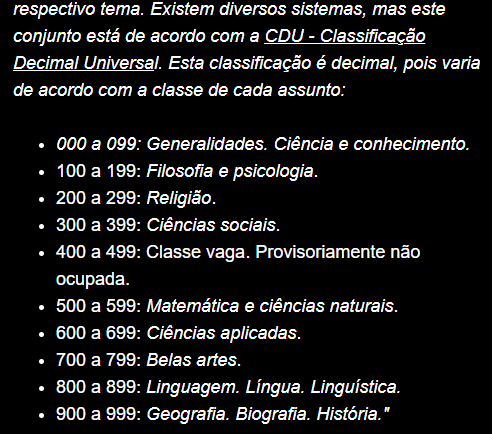

In [16]:
cdu = [0, 99, 199, 299 ,399, 499, 599, 699, 799, 899, 999]

In [6]:
labels = ['Generalidades. Ciência e conhecimento', 'Filosofia e psicologia', 'Religião', 'Ciências sociais', 
          'Classe vaga. Provisoriamente não ocupada', 'Matemática e ciências naturais', 'Ciências aplicadas',
          'Belas artes', 'Linguagem. Língua. Linguística', 'Geografia. Biografia. História']

In [17]:
pd.cut(x = dados.localizacao,
       bins = cdu,
       labels = labels,
       include_lowest = True)

0          Ciências aplicadas
1          Ciências aplicadas
2          Ciências aplicadas
3          Ciências aplicadas
4          Ciências aplicadas
                  ...        
2072517    Ciências aplicadas
2072518              Religião
2072519           Belas artes
2072520    Ciências aplicadas
2072521      Ciências sociais
Name: localizacao, Length: 2072522, dtype: category
Categories (10, object): ['Generalidades. Ciência e conhecimento' < 'Filosofia e psicologia' < 'Religião' < 'Ciências sociais' <
                          ... < 'Ciências aplicadas' < 'Belas artes' <
                          'Linguagem. Língua. Linguística' < 'Geografia. Biografia. História']

In [18]:
dados['CDU'] = pd.cut(x = dados.localizacao,
                      bins = cdu,
                      labels = labels,
                      include_lowest = True)

In [42]:
dados.query('localizacao == 99').head(2)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,CDU
1370967,1432599,2013003085,NaT,2013-02-25 16:45:31.572,2013-03-04 17:32:29,2626599.0,DOCENTE,1033865,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,99,206708,Generalidades. Ciência e conhecimento
1370968,1531577,2013003085,2013-07-16 17:01:40.285,2013-06-18 14:46:42.604,2013-07-30 13:39:30,2013211409.0,ALUNO DE PÓS-GRADUAÇÃO,1033865,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,99,206708,Generalidades. Ciência e conhecimento


In [43]:
dados.query('localizacao == 100').head(2)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,CDU
1519399,1645365,2008015036,NaT,2013-11-25 15:35:22.174,2013-12-11 16:42:37,2013053417.0,ALUNO DE GRADUAÇÃO,182231,Acervo Circulante,Biblioteca Setorial do Centro de Ciências Huma...,REGULAR,100,204979,Filosofia e psicologia
1539587,1670748,2013107631,2014-02-12 22:35:10.111,2014-01-28 18:30:39.398,2014-02-27 13:47:58,2011062963.0,ALUNO DE GRADUAÇÃO,1099233,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,100,205327,Filosofia e psicologia


# Excluir coluna:

In [46]:
dados.drop(columns = ['registro_sistema'], inplace = True)
dados.sample(2)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
9925,1254551,2006033800,NaT,2012-05-18 15:33:44.021,2012-05-29 17:13:33,2009011783.0,ALUNO DE GRADUAÇÃO,64980,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,638,Ciências aplicadas
376122,2499566,2007022686,NaT,2017-08-16 10:31:25.846,2017-08-28 09:28:45,20171012329.0,ALUNO DE PÓS-GRADUAÇÃO,241982,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,621,Ciências aplicadas
